PyTorch workflow fundamentals

this notebook basically follows the basic fundamental process of any ML model using pytorch
data --> building the model --> fiting the model to the data--> evaluating the model --> reiterating the process 




In [43]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

In [44]:
#lets start with the data
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02)
y = weight * X + bias

X[:10] , y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [45]:
#lets divide the data into train and test

train_len = int(0.8 * len(X))
X_train , y_train = X[:train_len] , y[:train_len]

X_test , y_test = X[train_len:] , y[train_len:]
len(X_train) , len(y_train), len(X_test) , len(y_test)

(40, 40, 10, 10)

In [46]:
#function to visualize the data 

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

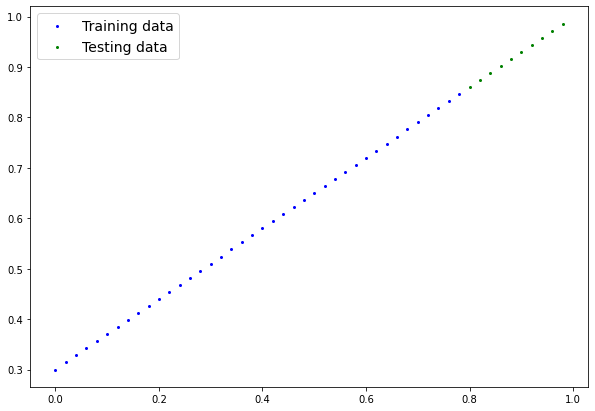

In [47]:
plot_predictions();

In [55]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1 , dtype = torch.float) , requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1 , dtype = torch.float) , requires_grad = True)

  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [56]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [57]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [59]:
# prediction using inference_mode() context manager
with torch.inference_mode():
  y_preds = model_0(X_test)

In [60]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [61]:
y_test - y_preds

tensor([0.4618, 0.4691, 0.4764, 0.4836, 0.4909, 0.4982, 0.5054, 0.5127, 0.5200,
        0.5272])

In [62]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


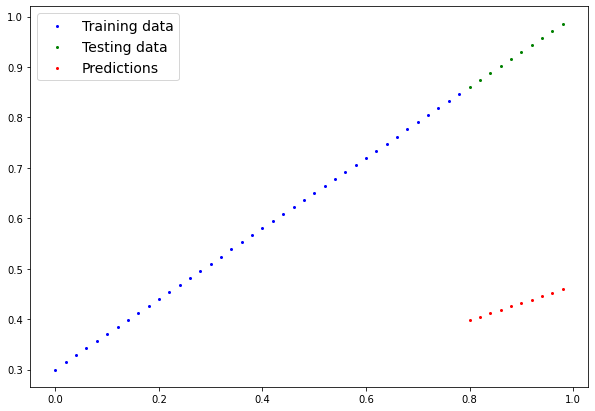

In [63]:
plot_predictions(predictions = y_preds)

In [78]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.001)

In [79]:
epoch_count = []
test_loss_list = []
train_loss_list = [] 


epochs = 100
for epoch in range(epochs):
  

  ### training loop code here ###
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### testing loop code here ###
  model_0.eval() #putting the model in evaluation mode
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred , y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_list.append(loss.detach().numpy())
      test_loss_list.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.007100802846252918 
Epoch: 10 | MAE Train Loss: 0.000704666948877275 | MAE Test Loss: 0.0015523552428930998 
Epoch: 20 | MAE Train Loss: 0.0003611445426940918 | MAE Test Loss: 0.0007936537149362266 
Epoch: 30 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 40 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 50 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 60 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 70 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 80 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 90 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 


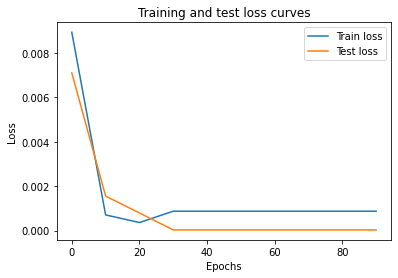

In [80]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_list, label="Train loss")
plt.plot(epoch_count, test_loss_list, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [81]:
print(epoch_count)
print(test_loss_list)
print(train_loss_list)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
[array(0.0071008, dtype=float32), array(0.00155236, dtype=float32), array(0.00079365, dtype=float32), array(2.8795004e-05, dtype=float32), array(2.8795004e-05, dtype=float32), array(2.8795004e-05, dtype=float32), array(2.8795004e-05, dtype=float32), array(2.8795004e-05, dtype=float32), array(2.8795004e-05, dtype=float32), array(2.8795004e-05, dtype=float32)]
[array(0.00893248, dtype=float32), array(0.00070467, dtype=float32), array(0.00036114, dtype=float32), array(0.000872, dtype=float32), array(0.000872, dtype=float32), array(0.000872, dtype=float32), array(0.000872, dtype=float32), array(0.000872, dtype=float32), array(0.000872, dtype=float32), array(0.000872, dtype=float32)]


In [82]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 10 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 20 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 30 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 40 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 50 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 60 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 70 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 80 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 
Epoch: 90 | MAE Train Loss: 0.0008720018086023629 | MAE Test Loss: 2.879500425478909e-05 


In [83]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6991])), ('bias', tensor([0.2995]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
